# IMPORT LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD CLEANED CSV

In [2]:
df = pd.read_csv("D:/MAIN PROJECTS/Airline_Data_Analysis/Datasets/flight_details_cleaned.csv")


# CONVERT Flight_Date TO datetime


In [3]:
df['Flight_Date'] = pd.to_datetime(df['Flight_Date'])

C:\Users\Vimal rajan\AppData\Local\Temp\ipykernel_36444\3227391882.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Flight_Date'] = pd.to_datetime(df['Flight_Date'])


# BASIC EDA: CHECK DATA


In [4]:
print("Dataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nDelay Category Counts:")
print(df['Delay_Category'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Flight_Date          10000 non-null  datetime64[ns]
 1   Airline_Name         10000 non-null  object        
 2   Origin_Airport       10000 non-null  object        
 3   Destination_Airport  10000 non-null  object        
 4   Scheduled_Departure  10000 non-null  int64         
 5   Actual_Departure     10000 non-null  int64         
 6   Departure_Delay      10000 non-null  int64         
 7   Scheduled_Arrival    10000 non-null  int64         
 8   Actual_Arrival       10000 non-null  int64         
 9   Arrival_Delay        10000 non-null  int64         
 10  Cancelled            10000 non-null  int64         
 11  Cancellation_Reason  10000 non-null  object        
 12  Delay_Category       9811 non-null   object        
 13  Route             

# PLOT 1: AVERAGE DEPARTURE BY AIRLINE


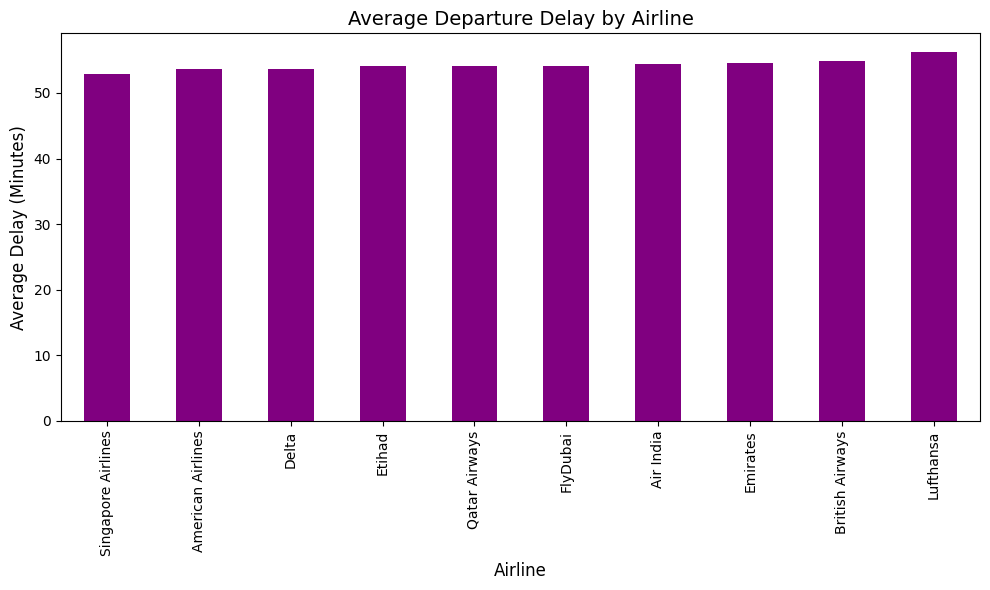

In [5]:
airline_delays = df.groupby('Airline_Name')['Departure_Delay'].mean().sort_values()
plt.figure(figsize=(10, 6))
airline_delays.plot(kind='bar', color='purple')
plt.title('Average Departure Delay by Airline', fontsize=14)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Delay (Minutes)', fontsize=12)
plt.tight_layout()
plt.savefig("D:/MAIN PROJECTS/Airline_Data_Analysis/EDA_Analysis_ipynb/EDA_screenshots/airline_delays.png", bbox_inches='tight', dpi=150)
plt.show()

# PLOT 2: DELAY CATEGORY DISTRIBUTION

C:\Users\Vimal rajan\AppData\Local\Temp\ipykernel_36444\1270933659.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Delay_Category', palette='Set2')


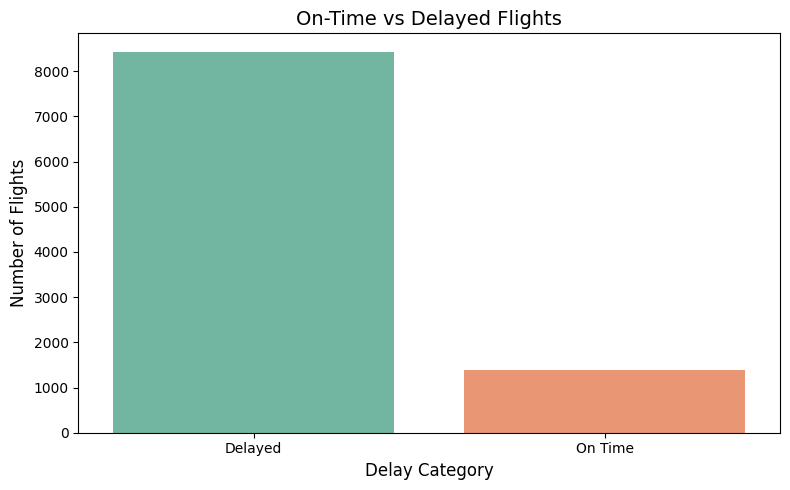

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Delay_Category', palette='Set2')
plt.title('On-Time vs Delayed Flights', fontsize=14)
plt.xlabel('Delay Category', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.tight_layout()
plt.savefig("D:/MAIN PROJECTS/Airline_Data_Analysis/EDA_Analysis_ipynb/EDA_screenshots/delay_category.png", bbox_inches='tight', dpi=150)
plt.show()

# PLOT 3: MONTHLY DELAY TRENDS

<Figure size 1200x600 with 0 Axes>

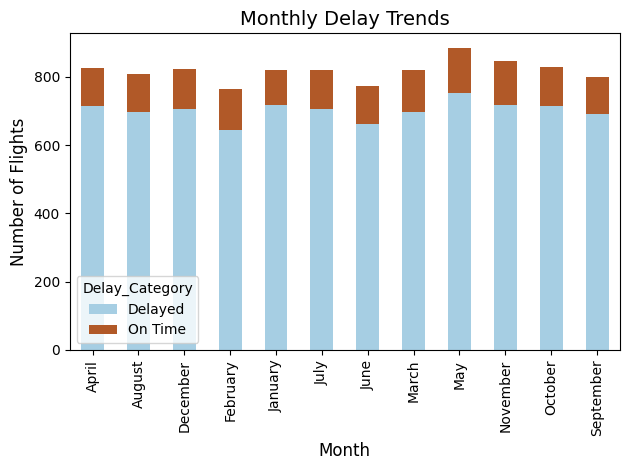

In [7]:
monthly_delays = df.groupby('Month')['Delay_Category'].value_counts().unstack()
plt.figure(figsize=(12, 6))
monthly_delays.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Monthly Delay Trends', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.tight_layout()
plt.savefig("D:/MAIN PROJECTS/Airline_Data_Analysis/EDA_Analysis_ipynb/EDA_screenshots/monthly_delays.png", bbox_inches='tight', dpi=150)
plt.show()

# ADDITIONAL ANALYSIS: TOP 5 ROUTES WITH HIGHEST DELAYS

In [8]:
top_routes = df.groupby('Route')['Departure_Delay'].mean().sort_values(ascending=False).head(5)
print("\nTop 5 Routes with Highest Average Delays:")
print(top_routes)


Top 5 Routes with Highest Average Delays:
Route
FRA to SFO    72.666667
BOM to JFK    71.692308
BKK to ORD    71.523810
JFK to DEL    70.900000
JFK to SIN    70.714286
Name: Departure_Delay, dtype: float64


# SAVE FINAL CLEANED DATA FOR POWER BI

In [9]:
df.to_csv("D:/MAIN PROJECTS/Airline_Data_Analysis/EDA_Analysis_ipynb/EDA_screenshots/final_flight_data.csv", index=False)
